## [教學目標]

學習 sklearn 中，各種評估指標的使用與意義


## [範例重點]

注意觀察各指標的數值範圍，以及輸入函數中的資料格式

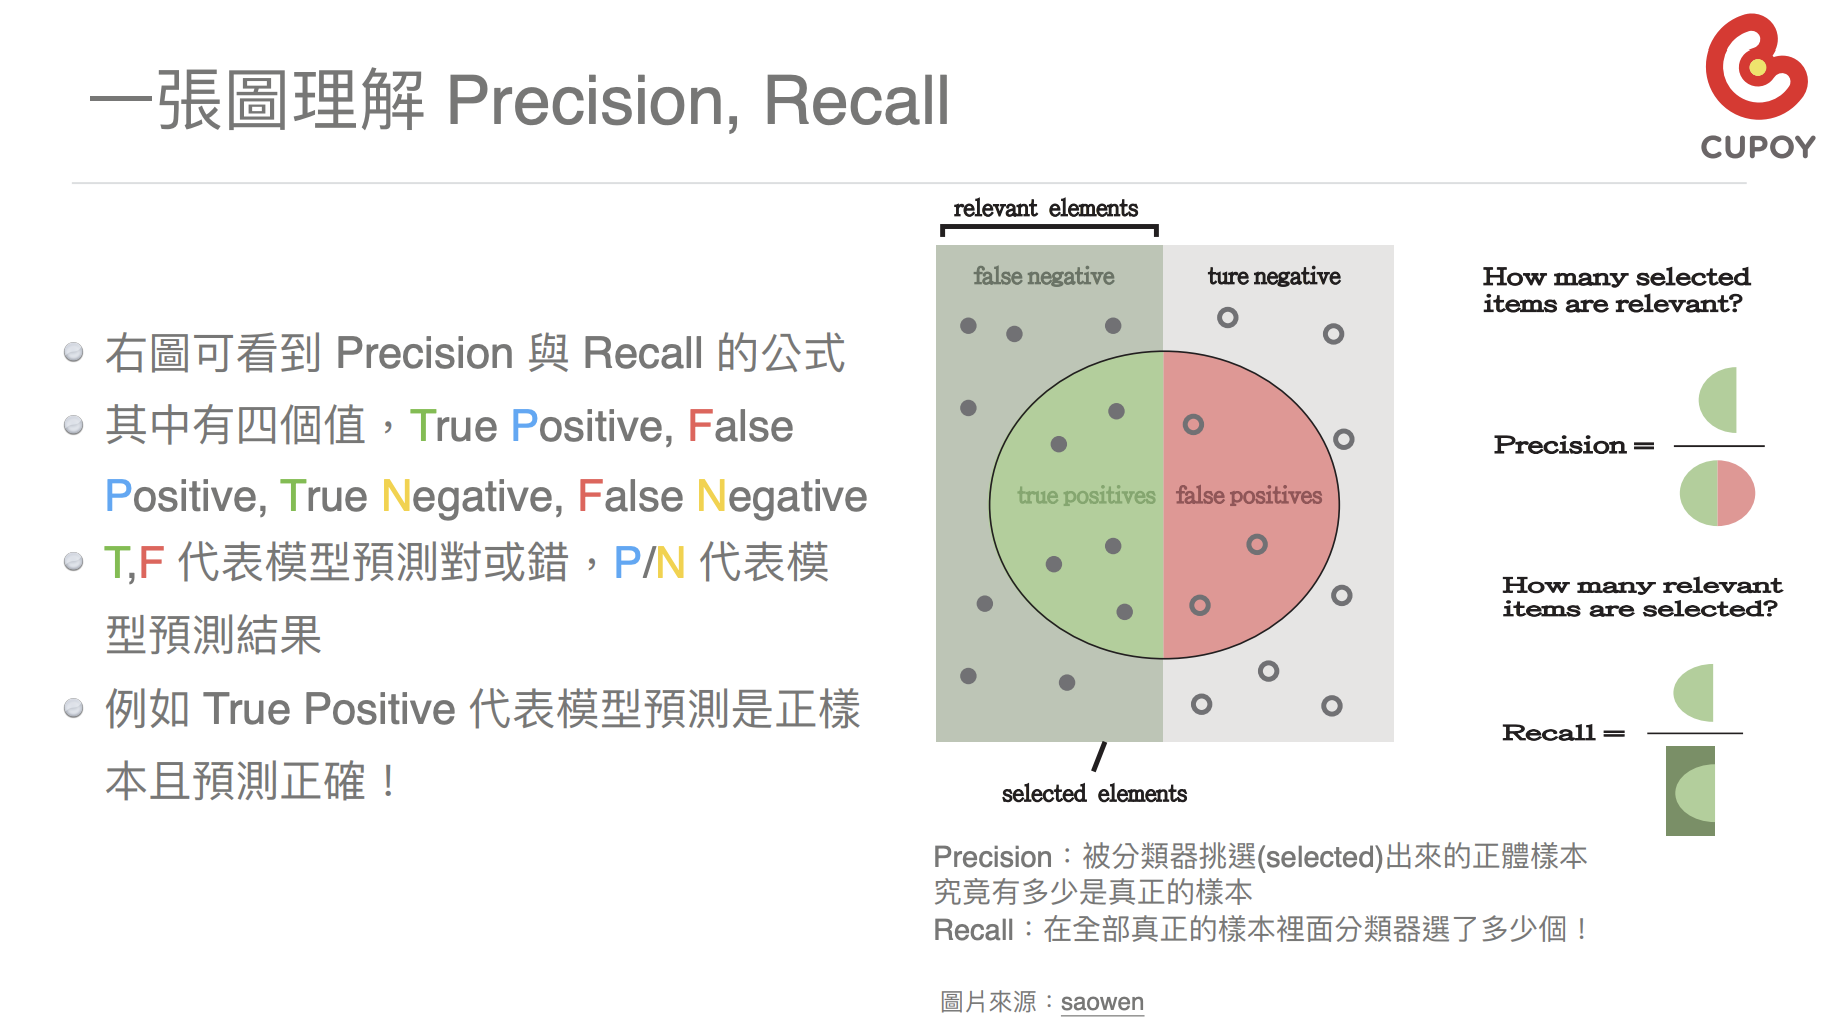

## How many selected items are relevant ?
> ## <font color='red'>Precision </font>  = TP / (TP + FP) = 左 / 上row
> #### <font color='red'>在 預測positive 裡面 有多少是 實際positive </font> 
> #### 在 selected items 裡面 有多少是 relevant

## How many relevant items are selected ?
> ## <font color='red'>Recall </font>     = TP / (TP + FN) = TPR (True Positive Rate) = 上 / 左col
> #### <font color='red'>在 實際positive 裡面 有多少是 預測positive </font> 
> #### 在 relevant 裡面 有多少是 selected items

## [如何辨別機器學習模型的好壞？秒懂Confusion Matrix](https://www.ycc.idv.tw/confusion-matrix.html)

![img1](http://www.ycc.idv.tw/media/mechine_learning_measure/mechine_learning_measure.001.jpeg)

![img2](http://www.ycc.idv.tw/media/mechine_learning_measure/mechine_learning_measure.002.jpeg)

![img3](http://www.ycc.idv.tw/media/mechine_learning_measure/mechine_learning_measure.003.jpeg)

![img4](http://www.ycc.idv.tw/media/mechine_learning_measure/mechine_learning_measure.005.jpeg)

![img5](http://www.ycc.idv.tw/media/mechine_learning_measure/mechine_learning_measure.006.jpeg)



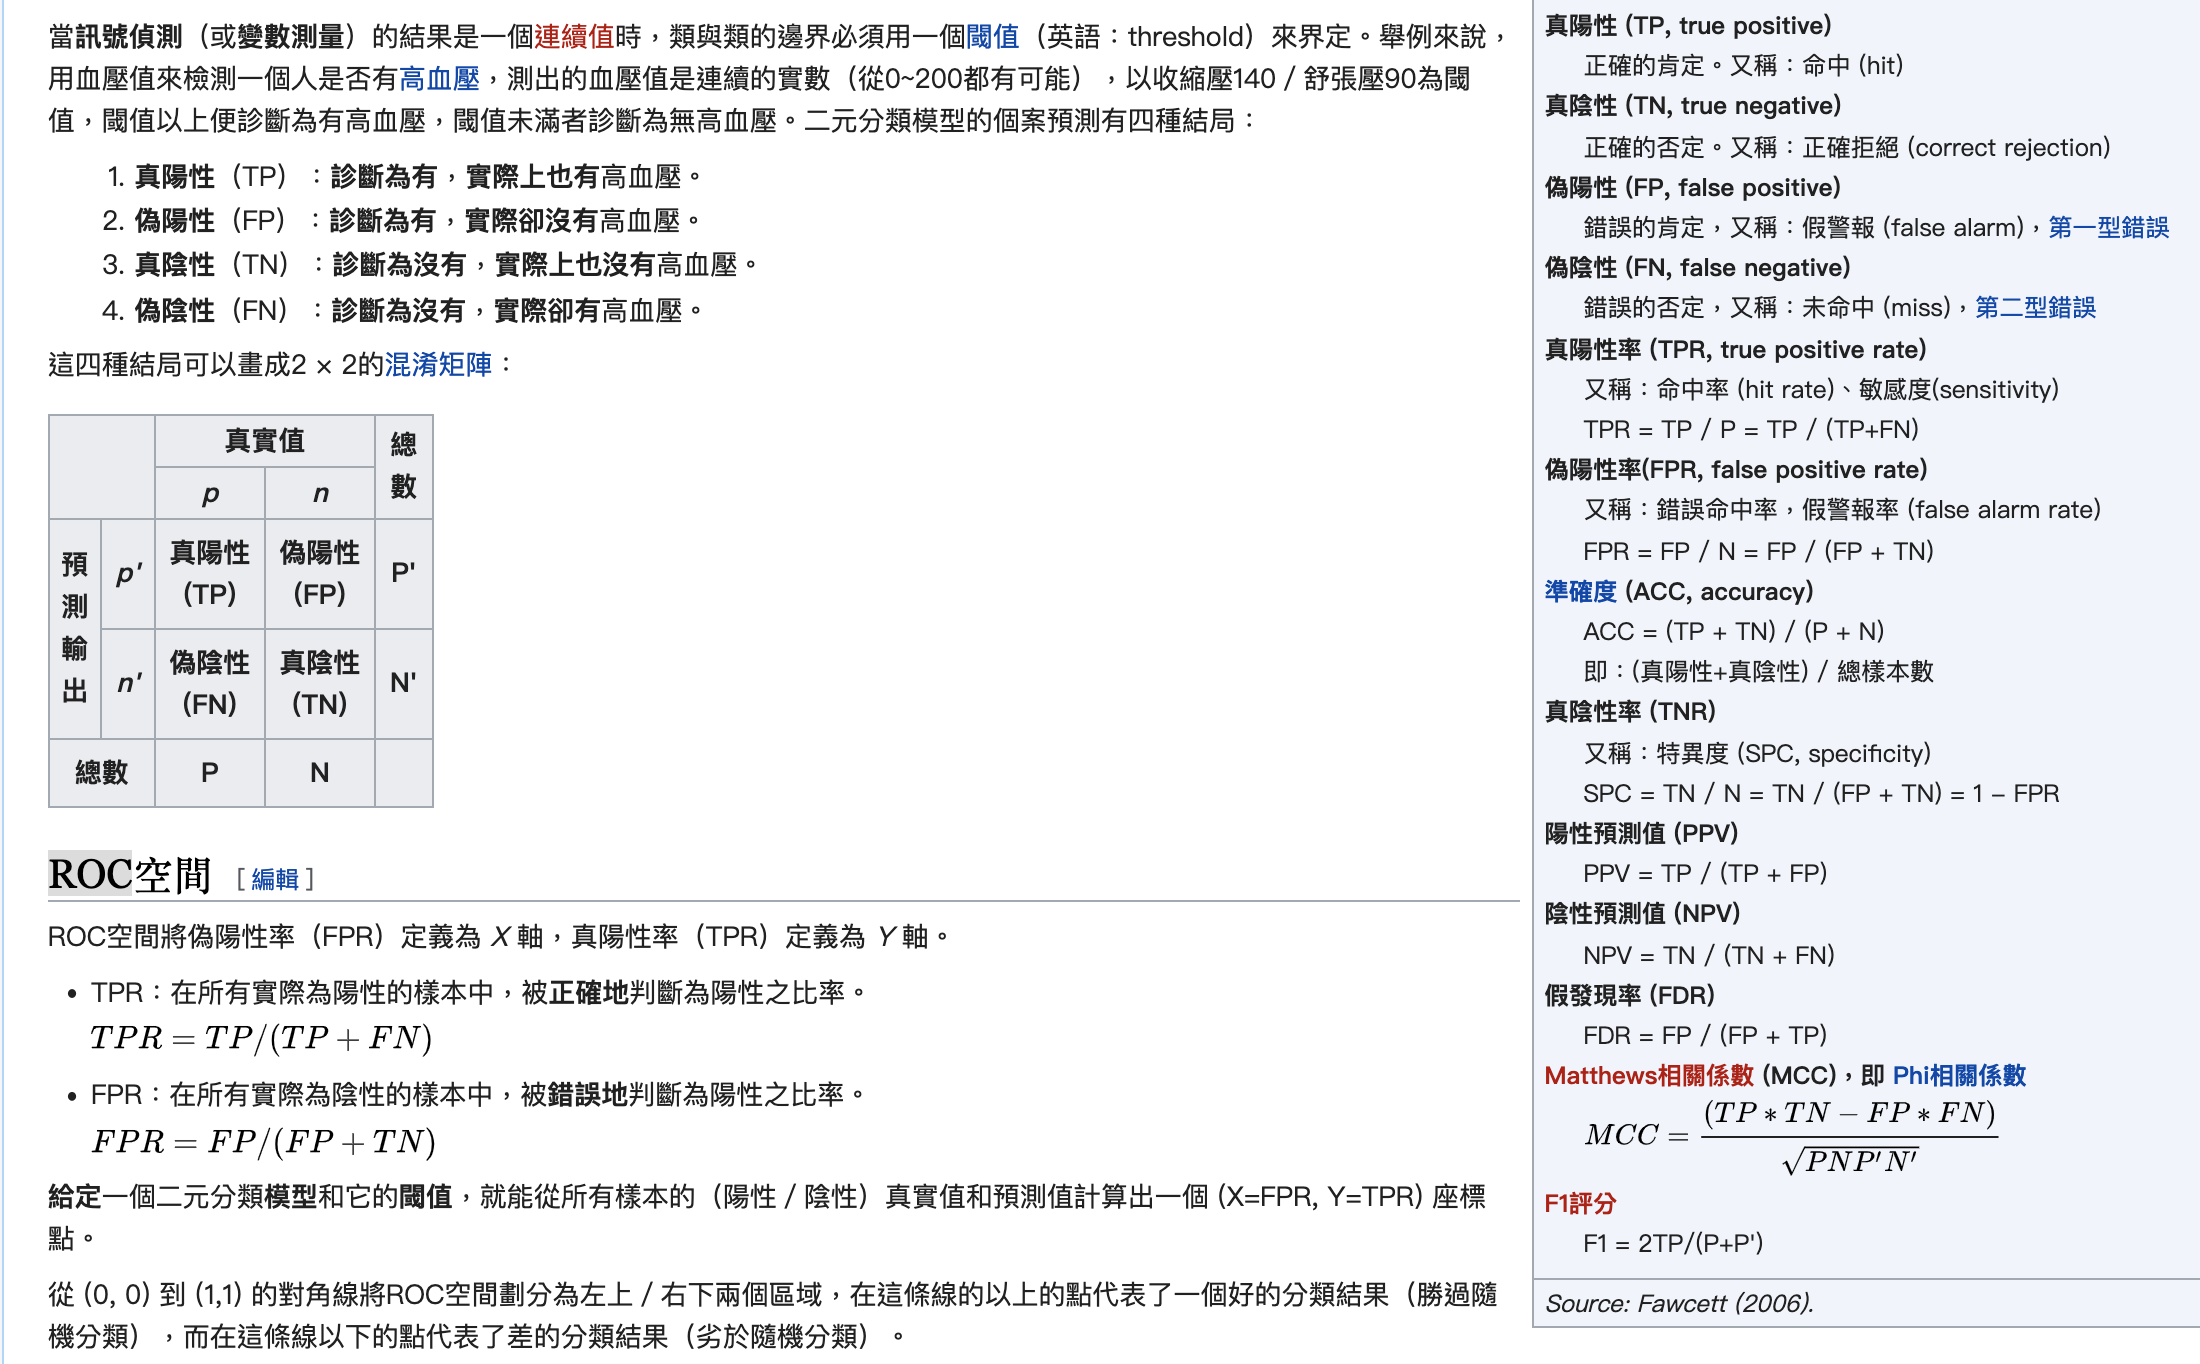

## ROC Curve

### <font color='dodgerblue'>Y軸是 TPR ( Recall ) </font> ， X軸是 FPR

In [1]:
from sklearn import metrics, datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import numpy as np
%matplotlib inline

## 回歸問題

常見的評估指標有

> ## 1. MAE
> ## 2. MSE
> ## 3. R-square

### 我們隨機生成(X, y)資料，然後使用線性回歸模型做預測，再使用 MAE, MSE, R-square 評估

In [2]:
# 隨機建立回歸資料
X, y = datasets.make_regression(n_features=1, random_state=42, noise=4) # 生成資料

model = LinearRegression() # 建立回歸模型
model.fit(X, y) # 將資料放進模型訓練
prediction = model.predict(X) # 進行預測
mae = metrics.mean_absolute_error(prediction, y) # 使用 MAE 評估
mse = metrics.mean_squared_error(prediction, y) # 使用 MSE 評估
r2 = metrics.r2_score(prediction, y) # 使用 r-square 評估

print("X[0:5]: %s \n" % X[0:5])
print("y[0:5]: %s \n" % y[0:5])
print("len(X), len(y) : %s, %s \n" % (len(X), len(y)))

print("MAE: ", mae)
print("MSE: ", mse)
print("R-square: ", r2)

X[0:5]: [[ 0.93128012]
 [ 0.08704707]
 [-1.05771093]
 [ 0.31424733]
 [-0.47917424]] 

y[0:5]: [ 43.6355659   -1.84604382 -40.45736756  12.08091485 -19.09610685] 

len(X), len(y) : 100, 100 

MAE:  2.8417972525655673
MSE:  12.488680067398239
R-square:  0.9916581036260311


## 分類問題

常見的評估指標有

> ## 1. AUC
> ## 2. F1-Score (Precision, Recall)

In [3]:
cancer = datasets.load_breast_cancer() # 我們使用 sklearn 內含的乳癌資料集
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=50, random_state=0)

In [4]:
print(y_test) # 測試集中的 label

[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0]


In [5]:
y_pred = np.random.random((50,)) # 我們先隨機生成 50 筆預測值，範圍都在 0~1 之間，代表機率值
y_pred

array([0.98201093, 0.57675352, 0.31633933, 0.60214558, 0.48042148,
       0.86953036, 0.59593716, 0.39803306, 0.17809847, 0.55016931,
       0.77437066, 0.17117606, 0.03307364, 0.55792303, 0.35537634,
       0.76016695, 0.67111589, 0.39909252, 0.30096021, 0.70178184,
       0.1115194 , 0.34311693, 0.35893933, 0.11782225, 0.58399217,
       0.95832478, 0.82180539, 0.84199572, 0.38645581, 0.05780073,
       0.9404229 , 0.70222567, 0.04788974, 0.2088875 , 0.57846383,
       0.22139625, 0.01422736, 0.44491163, 0.22855421, 0.02089728,
       0.62704749, 0.39806792, 0.54368008, 0.52569534, 0.26455588,
       0.36444263, 0.22874479, 0.67072866, 0.47630986, 0.67870433])

## AUC

In [6]:
auc = metrics.roc_auc_score(y_test, y_pred) # 使用 roc_auc_score 來評估。 **這邊特別注意 y_pred 必須要放機率值進去!**
print("AUC: ", auc) # 得到結果約 0.5，與亂猜的結果相近，因為我們的預測值是用隨機生成的

AUC:  0.4787775891341256


## F1-Score

In [7]:
threshold = 0.5 
y_pred_binarized = np.where(y_pred>threshold, 1, 0) # 使用 np.where 函數, 將 y_pred > 0.5 的值變為 1，小於 0.5 的為 0
f1 = metrics.f1_score(y_test, y_pred_binarized) # 使用 F1-Score 評估
precision = metrics.precision_score(y_test, y_pred_binarized) # 使用 Precision 評估
recall  = metrics.recall_score(y_test, y_pred_binarized) # 使用 recall 評估
print("F1-Score: ", f1) 
print("Precision: ", precision)
print("Recall: ", recall)

F1-Score:  0.5185185185185185
Precision:  0.6086956521739131
Recall:  0.45161290322580644


## [作業重點]

了解 F1-score 的公式意義，並試著理解程式碼

## 作業

請參考 F1-score 的公式與[原始碼](https://github.com/scikit-learn/scikit-learn/blob/bac89c2/sklearn/metrics/classification.py#L620)，試著寫出 F2-Score 的計算函數

## 練習時間

F1-Score 其實是 F-Score 中的 β 值為 1 的特例，代表 Precision 與 Recall 的權重相同
請參考 F1-score 的公式 與下圖的 F2-score 公式圖，試著寫出 F2-Score 的計算函數

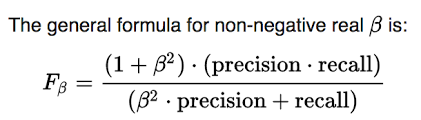

HINT: 可使用 slearn.metrics 中的 precision, recall 函數幫忙

In [8]:
import numpy as np
y_pred = np.random.randint(2, size=100)  # 生成 100 個隨機的 0 / 1 prediction
y_true = np.random.randint(2, size=100)  # 生成 100 個隨機的 0 / 1 ground truth
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [9]:
# F1 = 2 * (precision * recall) / (precision + recall)
# F2 = 5 * (precision * recall) / (4 * (precision + recall))

precision = metrics.precision_score(y_test, y_pred_binarized) # 使用 Precision 評估
recall  = metrics.recall_score(y_test, y_pred_binarized) # 使用 recall 評估
F2 = 5 * (precision * recall) / (4*precision + recall)
F2

0.47619047619047616

In [10]:
beta = 2
F2_score = (1 + beta**2) * precision * recall / ((beta**2) * precision + recall)
print("Precision: ", precision)
print("Recall: ", recall)
print("F2-Score: ", F2_score)

Precision:  0.6086956521739131
Recall:  0.45161290322580644
F2-Score:  0.47619047619047616


## 參考資料
---

## 深入了解超常用的指標 AUC

[網頁連結：超詳細解說 AUC (英文)](https://www.dataschool.io/roc-curves-and-auc-explained/)



## 學習更多評估指標，來衡量機器學習模型的準確度

[網頁連結：更多評估指標](https://zhuanlan.zhihu.com/p/30721429)